In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import load_model

In [31]:
train_data_dir = './data/train'
valid_data_dir = './data/validation'
test_data_dir = './data/test'

In [32]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=10,
        classes=['dogs','cats'])  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir,
        target_size=(150, 150),
        batch_size=10,
        classes=['dogs','cats'])   #class_mode='binary') then either 0 or 1
# this is a similar generator, for validation data
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir,
        target_size=(150, 150),
        batch_size=10,
        classes=['dogs','cats'])   #class_mode='binary')

Found 1950 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [33]:
# dimensions of our images.
img_width, img_height = 150, 150
nb_train_samples = 2000
nb_validation_samples = 1000
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
print(input_shape,'input_shape')

(150, 150, 3) input_shape


In [34]:
print(train_generator.class_indices)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{'dogs': 0, 'cats': 1}
{0: 'dogs', 1: 'cats'}


[0 0 1 0 0 1 0 1 1 0]
['dogs', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'cats', 'cats', 'dogs']


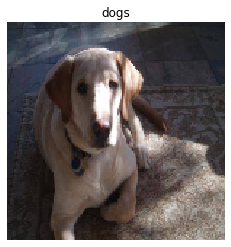

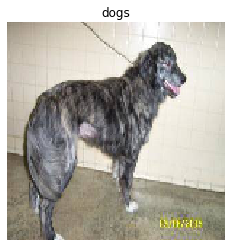

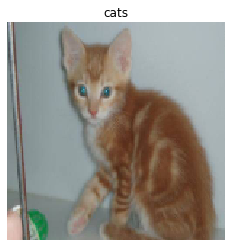

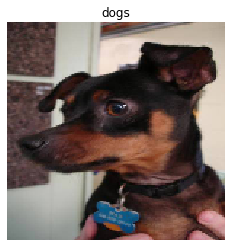

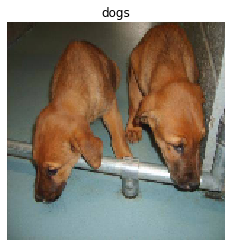

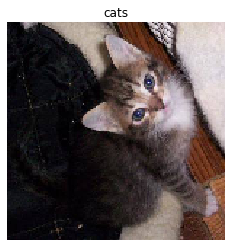

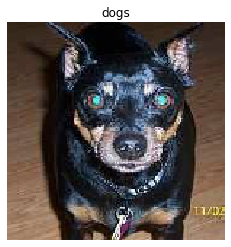

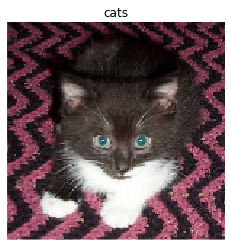

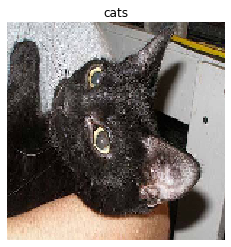

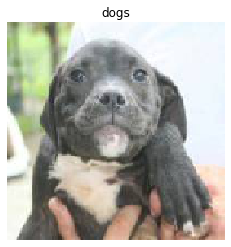

In [35]:
# imgs,labels=next(train_generator)
train_img,train_labels=next(train_generator)
print(np.argmax(train_labels,axis=1))
train_lab=[labels[i] for i in np.argmax(train_labels,axis=1)]
print(train_lab)
image = train_img[0]
for i in range(0,10):
    plt.imshow(train_img[i])
    plt.axis('off')
    plt.title(train_lab[i])
    plt.show()

In [36]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST)

195 5 5


#### Build Train CNN

In [37]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Conv2D(128, (3, 3), input_shape=input_shape))

In [38]:
model.add(Flatten()) 
model.add(Dense(2))
model.add(Activation('softmax'))

In [39]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',\
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 144, 144, 128)     73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2654208)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 5308418   
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 5,401,666
Trainable params: 5,401,666
Non-trainable params: 0
____________________________________________

In [41]:
model.fit_generator(generator=train_generator,validation_data=valid_generator,\
                    steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,verbose=1,epochs=5)


Epoch 1/5
195/195 [==============================] - 313s 2s/step - loss: 7.6620 - accuracy: 0.4990 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 2/5
195/195 [==============================] - 428s 2s/step - loss: 7.6895 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 3/5
195/195 [==============================] - 462s 2s/step - loss: 7.6895 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 4/5
195/195 [==============================] - 470s 2s/step - loss: 7.6895 - accuracy: 0.5000 - val_loss: 6.1348 - val_accuracy: 0.5000
Epoch 5/5
195/195 [==============================] - 303s 2s/step - loss: 7.6895 - accuracy: 0.5000 - val_loss: 4.6011 - val_accuracy: 0.5000


In [42]:
model.save('./catdogop.h5')

In [43]:
#model.get_weights()

In [44]:
models=load_model('./catdogop.h5')
models.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 144, 144, 128)     73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2654208)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 5308418   
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 5,401,666
Trainable params: 5,401,666
Non-trainable params: 0
____________________________________________

In [45]:
test_img,test_labels=next(test_generator)

In [46]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=1,
verbose=1)

1/1 [==============================] - 1s 563ms/step


In [47]:
predicted_class_indices=np.argmax(pred,axis=1)
test_labels_indices=np.argmax(test_labels,axis=1)

In [48]:
predictions = [labels[k] for k in predicted_class_indices]
test_labes=[labels[k] for k in test_labels_indices]

In [49]:
confusion_matrix(test_labes,predictions)

array([[0, 7],
       [0, 3]])

In [50]:
print(classification_report(test_labes,predictions))

              precision    recall  f1-score   support

        cats       0.00      0.00      0.00         7
        dogs       0.30      1.00      0.46         3

    accuracy                           0.30        10
   macro avg       0.15      0.50      0.23        10
weighted avg       0.09      0.30      0.14        10



/Users/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


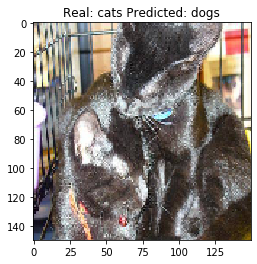

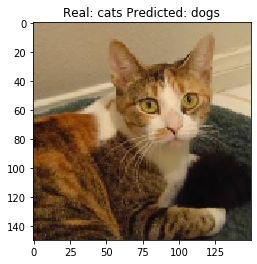

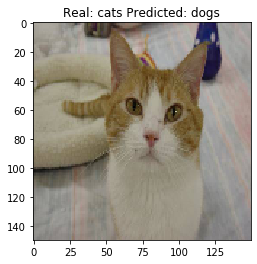

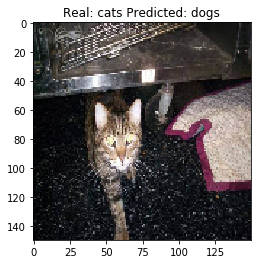

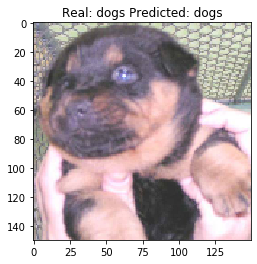

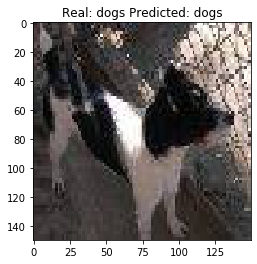

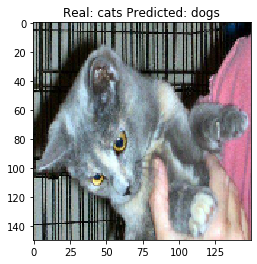

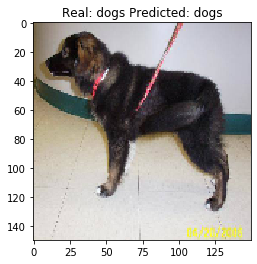

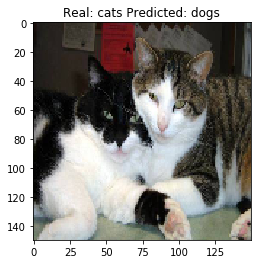

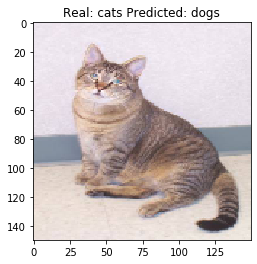

In [51]:
#keras shape size ,plot image ,scaling ,channels_first,image transpose
for i in range(10):
    plt.imshow(test_img[i])
    plt.title('Real: {} Predicted: {}'.format(test_labes[i],predictions[i]))
    plt.show()